# Camera Calibration - Part1
<hr style="border:3px solid red"> </hr>

### Camera Extrinsic and Intrisic
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this post we'll discuss about cameras and the parameters we use to describe about our cameras, these parameters are so called **Camera Intrinsic** and **Camera Extrinsic** parameters. But most of the concepts presented here require knowledge of [Projective Geometry in 2 Dimensions](https://prithviramg.github.io/posts/Projective%20Geometry%20and%20Transformations%20of%202D.html).So now lets dive into these parameters and know about what are all the physical properties they describe how the mapping from **3D** world into **2D** image plane actually works. So its all about describing this mapping shown below and its all about question how do we get **3D (X,Y,Z) world point** to **2D (x,y) image point**. This Transformation is encoded in the ***Projection Matrix***
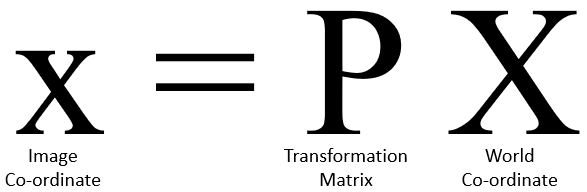
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now lets understand what parameters are present inside the matrix **P** and what parameters we need to know inorder write that down in mathematical form, which allows the mapping. This is one of the most general equation for performing any of the geometrical estimates like where the camera is? or where the 3D point is in the environment?. So whenever geometry involves this equation popups at some point of time, so it is very important to understand how those parameters present in the transformation matrix effect the image generation process 

$$\begin{pmatrix} x\\y\\1 \end{pmatrix}_{Homogeneous-2D} = P \times \begin{pmatrix} X\\Y\\Z\\1 \end{pmatrix}_{Homogeneous-3D}$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The above equation is in [homogeneous form](https://prithviramg.github.io/posts/Projective%20Geometry%20and%20Transformations%20of%202D.html). To make life easier we'll just follow a nomenclature, whenever we see smaller case alphabets that belongs to image co-ordinate and upper case alphabets belongs to world co-ordinate.

#### Projection Matrix (transformation matrix)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The mapping of **3D** to **2D** is typically broken down into several transformation, because there are several co-ordinate systems involved. This transfomation consists of sequence of several transformations (listed below) performing through the chain of this co-ordinate systems 
- World/Object Co-ordinate system $S_o = \begin{pmatrix} X\\Y\\Z\end{pmatrix}$
- Camera Co-ordinate system $S_k = \begin{pmatrix} ^k\!X\\^k\!Y\\^k\!Z\end{pmatrix}$
- Image (plane) co-ordinate system $S_c = \begin{pmatrix} ^c\!x\\^c\!y\end{pmatrix}$
- Sensor Co-ordinate system $S_s = \begin{pmatrix} ^s\!x\\^s\!y\end{pmatrix}$


$$ \underbrace{\begin{pmatrix} ^sx\\^sy\\1 \end{pmatrix}}_\text{Sensor System} = \underbrace{(^s\!H_c)}_\text{image plane to sensor}\quad\underbrace{(^c\!P_k)}_\text{camera to image}\quad\underbrace{(^k\!H_o)}_\text{object to camera}\underbrace{\begin{pmatrix} X\\Y\\Z\\1 \end{pmatrix}}_\text{object system}$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The above equation can be described from right to left as the point in 3D world in object co-ordinate system$\begin{pmatrix} ^sx\\^sy\\1 \end{pmatrix}$, mapping from object co-ordinate system to camera co-ordinate system$(^k\!H_o)$, projection matrix from camera co-ordinate system to image co-ordinate system $(^c\!P_k)$ and finally image co-ordinate to system to sensor chip $(^s\!H_c)$. So what we want to do is to find these parameters and chain them together to get the project matrix
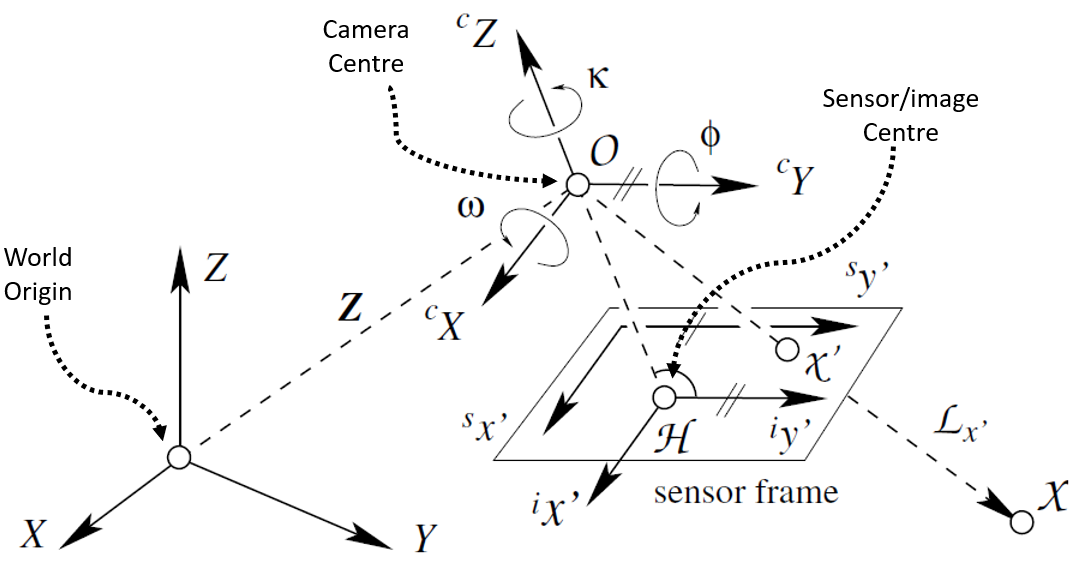
<div align="right"><font size=3>image courstesy: Forestner</div>

#### From World to image
- **Extrinsic Parameters** - describe the pose of the camera in the world
- **Intrinsic Parameters** - describe the mapping of the scene in front of the camera to the image pixels in final image
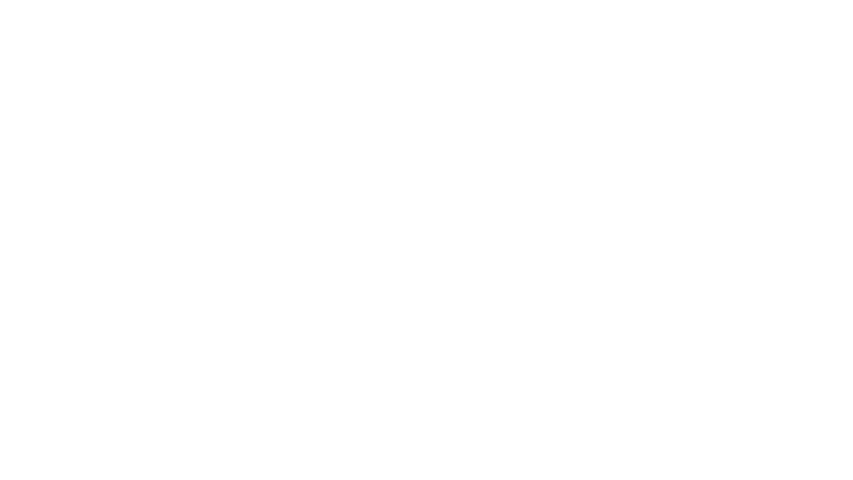
##### Extrinsic Parameters 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $R,T$ are the extrinsic parameters which denote the coordinate system transformations from 3D world coordinates to 3D camera coordinates. Equivalently, the extrinsic parameters define the position of the camera center and the camera's heading in world coordinates. $\displaystyle T$ is the position of the origin of the world coordinate system expressed in coordinates of the camera-centered coordinate system. $\displaystyle T$ is often mistakenly considered the position of the camera. The position, $\displaystyle C$, of the camera expressed in world coordinates is $C=-R^{{-1}}T=-R^{T}T$ (since $R$ is a rotation(orthonormal) matrix). $${\begin{bmatrix}R_{3\times 3}&T_{3\times 1}\\0_{1\times 3}&1\end{bmatrix}}_{4\times 4}$$
$$\begin{align*}
\text{6 degrees of freedom} :\\
&\text{3 for position +} \\
&\text{3 for rotation}\\
\end{align*}$$
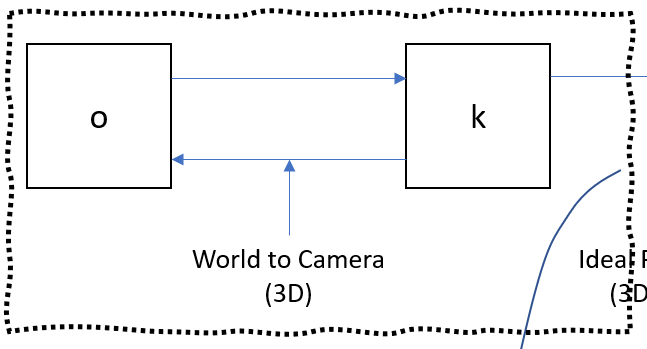
- Point $P$ with coordinates in the world coordinates $X_p = \begin{pmatrix} X_p\\Y_p\\Z_p \end{pmatrix}$
- Center $O$ of the projection center (orgin of the camera camera coordinate system) $X_o = \begin{pmatrix} X_o\\Y_o\\Z_o \end{pmatrix}$, this also sometimes called as $Z_o$
- **Translation** - between the orgin of the world coordinate system and the camera coordinate system $X_o = \begin{pmatrix} X_o\\Y_o\\Z_o \end{pmatrix}$
- **Rotation** - $R$ from $S_o$ to $S_k$.
- In Euclidean coordinates this yields $^k\!X_p = R(X_p - X_o)$ 
- Expressed in Homogeneous coordinates $$\begin{align*}
\begin{pmatrix} {^k\!X_p}_{3 \times 3}\\1 \end{pmatrix} &= \begin{pmatrix}R_{3\times3}&0_{3\times1}\\{0^T}_{1\times3}&1\end{pmatrix}\begin{pmatrix}I_{3 \times 3}& -{X_o}_{3 \times 1}\\{0^T}_{1\times3}&1\end{pmatrix}
\begin{pmatrix}{X_p}_{3 \times 3}\\1\end{pmatrix}
\\&=  \begin{pmatrix}R_{3 \times 3}& -{RX_o}_{3 \times 1}\\{0^T}_{1\times3}&1\end{pmatrix}\begin{pmatrix}{X_p}_{3 \times 3}\\1\end{pmatrix}
\\&={^k\!H}\begin{pmatrix}{X_p}_{3 \times 3}\\1\end{pmatrix}\end{align*}$$

##### Intrinsic Parameters
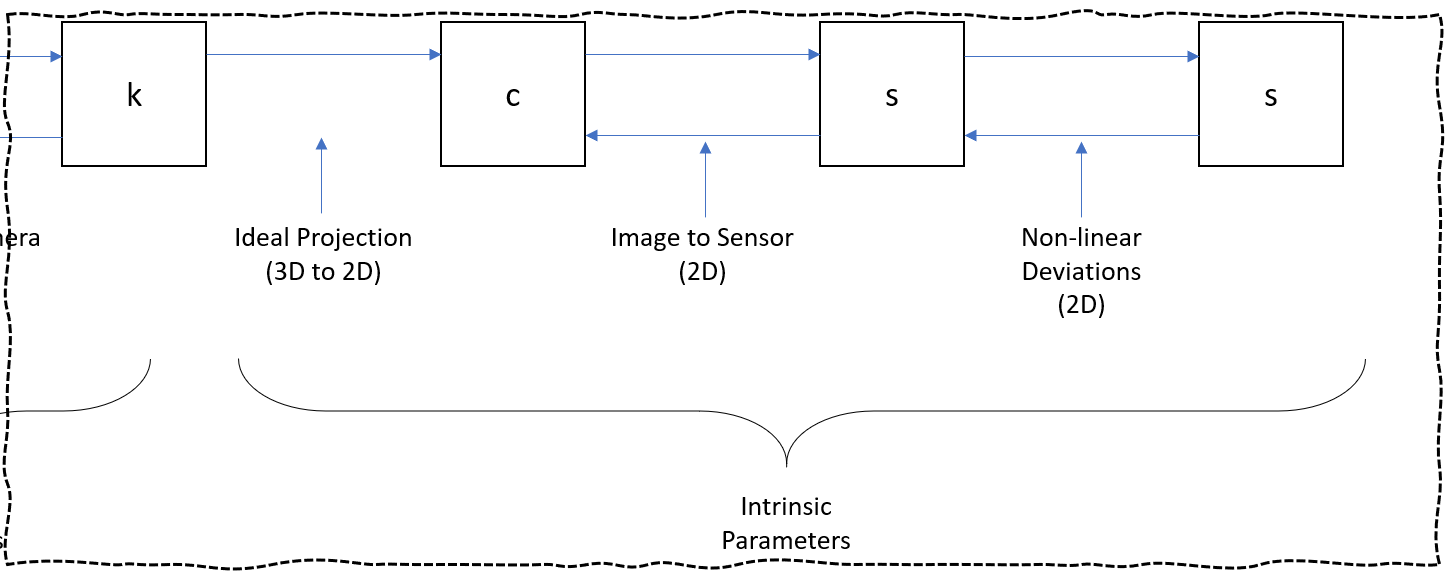

##### Ideal Projection
- Assume it to be Distortion free lens, that's not the case in reality, but we assume it to be perfect here, there will be non-linear errors we'll see how to tackle those errors in later section of this post
- All rays are straight lines and pass through the projection center of the camera. So all rays pass through one single point, which should be a perfect pin-hole camera model, and again here it is not the case because pin-hole is not infinetlly small it has a certain size in real world.
- Focal point and principal point lie on the optical axis, this is the assumption we are doing so that optical axis passes perpendicular to the focal point and principal point and the distance from camera to image plane is constant, so it is same distance everywhere 
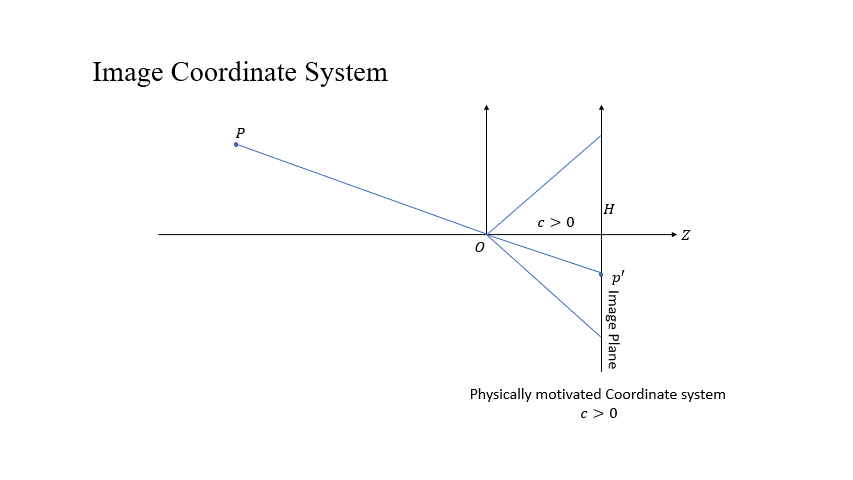
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The world point $P$ in 3D world that passes through the projection center and then onto the image plane. So we'll generate the image which will be upside down, this kind of physically motivated model, so the coordinate system looks like if we look into physics, it means that $Z$ axis points backwards and camera constant is positive. But what we use in computer vision is typically the image plane is rotated $180^0$, So the image plane sits in front of the camera. Although this not inline with physics but this analogy will be better for camera calibration analysis. So we'll be using the non-physically model, where the image plane sits inbetween the projection center and 3D world point.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now to express where the projected point will be on image using **intercept theory**. There are 2 parallel lines formed if we drop down a line from 3D world point $P$ and a line from new image point $p'$
$$\begin{align*}
^c\!x_p &= {^k\!X_p} &= c\frac {^k\!X_p}{^k\!Z_p}\\
^c\!y_p &= {^k\!Y_p} &= c\frac {^k\!Y_p}{^k\!Z_p}\\
 c &= {^k\!Z_p} &= c\frac {^k\!Z_p}{^k\!Z_p}
\end{align*}$$
We can express that in Homogeneous coordinate as
$$\begin{pmatrix}^k\!U_p\\^k\!V_p\\^k\!W_p\\^k\!T_p\end{pmatrix} = \begin{pmatrix}c&0&0&0\\0&c&0&0\\0&0&c&0\\0&0&1&0\end{pmatrix}\begin{pmatrix}^k\!X_P\\^k\!Y_P\\^k\!Z_P\\1\end{pmatrix}$$
and drop the $3^{rd}$ coordinate (row)
$$\begin{align*}
^c\!x_p &= \begin{pmatrix} ^c\!u_p\\^c\!v_p\\^c\!w_p\end{pmatrix} = \begin{pmatrix}c&0&0&0\\0&c&0&0\\0&0&1&0\end{pmatrix}\begin{pmatrix}^k\!X_P\\^k\!Y_P\\^k\!Z_P\\1\end{pmatrix}\\
&= \begin{pmatrix} \frac{^cu_p}{^cw_p}\\\frac{^cv_p}{^cw_p}\\1\end{pmatrix}
\end{align*}$$

So finally we have arrived to combine extrinsics and now the projection matrices to convert the 3D world point to 2D image point.
$$\begin{align*}
^c\!x &= {^c\!P} X\\
&= {^c\!P_k}{^kH} X=\underbrace{\begin{pmatrix}c&0&0&0\\0&c&0&0\\0&0&1&0\end{pmatrix}}_\text{camera to image coordinate}\underbrace{\begin{pmatrix}R_{3 \times 3}&(-RX_o)_{3\times1}\\{0^T}_{1 \times3}&1\end{pmatrix}}_\text{world to camera coordinate}
\begin{pmatrix}X_P\\Y_P\\Z_P\\1\end{pmatrix}
\end{align*}$$
so now what we typically do going further next mapping on the sensor chip there will again another matrix need to be added in front of projection matrix, but what we are going to do is combine all the elements in projection matrix itself, and that matrix is called as **Calibration Matrix**. So typically we express the calibration matrix as $3\times3$ matrix. We can write the overall mapping as
$$\begin{align*}
^c\!P = {^c\!K}[R \quad|\quad -RX_o] &= {^c\!K}R[I_3\quad |\quad -X_o]\begin{pmatrix}X_P\\Y_P\\Z_P\\1\end{pmatrix}\\
&={^c\!K}R \begin{pmatrix}1&0&0&-X_o\\0&1&0&-Y_o\\0&0&1&-Z_o\end{pmatrix}\begin{pmatrix}X_P\\Y_P\\Z_P\\1\end{pmatrix}\\
&=\begin{pmatrix}c&0&0\\0&c&0\\0&0&1\end{pmatrix}\begin{pmatrix}r_{11}&r_{12}&r_{13}\\r_{21}&r_{22}&r_{23}\\r_{31}&r_{32}&r_{33}\end{pmatrix}\begin{pmatrix}X_P-X_o\\Y_P-Y_o\\Z_P-Z_o\end{pmatrix}\\
\end{align*}\\$$
$$\text{or in Euclidean coordinates}$$
$$\begin{align*}
^c\!x &= c\frac{r_{11}(X_P-X_o) + r_{12}(Y_P-Y_o) + r_{13}(Z_P-Z_o)}{r_{31}(X_P-X_o) + r_{32}(Y_P-Y_o) + r_{33}(Z_P-Z_o)}\\
^c\!y &= c\frac{r_{21}(X_P-X_o) + r_{22}(Y_P-Y_o) + r_{23}(Z_P-Z_o)}{r_{31}(X_P-X_o) + r_{32}(Y_P-Y_o) + r_{33}(Z_P-Z_o)}
\end{align*}$$

##### Mapping from image Plane to Sensor chip (assuming only linear errors)
- Next step is to map the point from image plane onto the sensor, the important point here is location principal point, **Principal Point** is a point where the optical axis passes through the image plane, so it is basically where the $(0,0)$ on image plane is mapped to pixel coordinate in sensor chip. The origin of the sensor system is not at the principal point
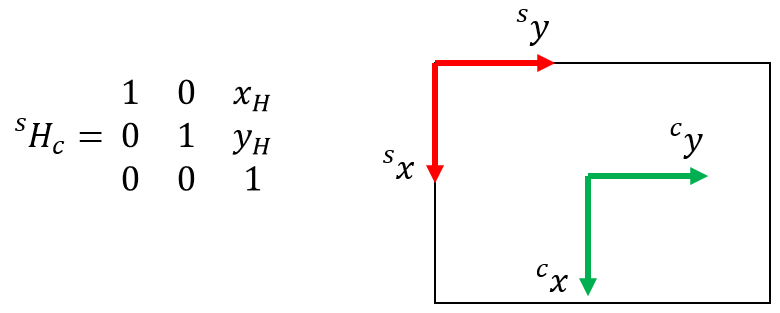
- the second thing is we have the scale difference in $x$ and $y$ dimension based on the chip design, so we typically have a sheer factor, although it is typically 0 for digital cameras today. Scale difference $m$ in $x$ and $y$.
$$^s\!H_c = \begin{pmatrix}1&s&x_H\\0&1+m&y_H\\0&0&1\end{pmatrix}$$
<br>
So finally we obtain the equation as
$$\begin{align*}
^s\!x &= {^s\!H_c}{^c\!K}R[I_3\quad |\quad -X_o]\begin{pmatrix}X_P\\Y_P\\Z_P\\1\end{pmatrix}\\
&= \begin{pmatrix}c&cs&x_H\\0&c(1+m)&y_H\\0&0&1\end{pmatrix}\begin{pmatrix}r_{11}&r_{12}&r_{13}\\r_{21}&r_{22}&r_{23}\\r_{31}&r_{32}&r_{33}\end{pmatrix}\begin{pmatrix}X_P-X_o\\Y_P-Y_o\\Z_P-Z_o\end{pmatrix}
\end{align*}$$
- The calibration matrix is an affine transformation
$$K = \begin{pmatrix}c&cs&x_H\\0&c(1+m)&y_H\\0&0&1\end{pmatrix}$$
$$\text{contains 5 Parameters}$$
$$\text{Principal point: }x_H,y_H$$
$$\text{camera constant: }c$$
$$\text{scale difference: }m$$
$$\text{sheer: }s$$

#### Non-Linear Errors
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; There are several reasons for non-linear errors, the popular ones are your lens distortion error, for example if we take wide lens, we can get barrel distortion i.e the straight lines will be appearing as barrels. To get rid of this we should know the geometric properties of the image distortions.
- Idea: add the a last step that covers the non-linear effects
- Location-dependent shift in the sensor coordinate system. It means that every pixel will get shifted little bit in $x$ and $y$ directions. This is dependent of location of pixel on the image, it means each pixel will get different amount distances for shifting
- Individual shift for each pixel 
- General mapping
$$\begin{align*}
^a\!x &= ^s\!x + \bigtriangleup x(x,q)\\
^a\!y &= ^s\!y + \bigtriangleup y(x,q)
\end{align*}$$

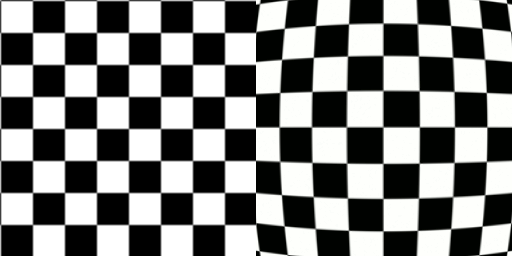
<div align="center"><font size=4>Barrel Distortion</div>
<div align="right"><font size=2>image courstesy: wikipedia</div>
The above is just an example, in the left it is an image of checkerboard and in the right the barrel distorted image of checkerboard, so we can observe that straight lines are really not straight, they are curved. This happens due to lens distortion, where straight line in the world are not mapped to straight line in image
<br><br>
The General mapping yields:
    $$^a\!H_s(x) = \begin{pmatrix}1&0&\bigtriangleup x(x,q)\\1&0&\bigtriangleup y(x,q)\\0&0&1\end{pmatrix}$$
so this brings us to finally :
    $$^ax = \begin{pmatrix}c&cs&x_H+\bigtriangleup x(x,q)\\0&c(1+m)&y_H+\bigtriangleup y(x,q)\\0&0&1\end{pmatrix}\begin{pmatrix}r_{11}&r_{12}&r_{13}\\r_{21}&r_{22}&r_{23}\\r_{31}&r_{32}&r_{33}\end{pmatrix}\begin{pmatrix}X_P-X_o\\Y_P-Y_o\\Z_P-Z_o\end{pmatrix}$$

#### Classification of cameras (based on Calibration Matrices)
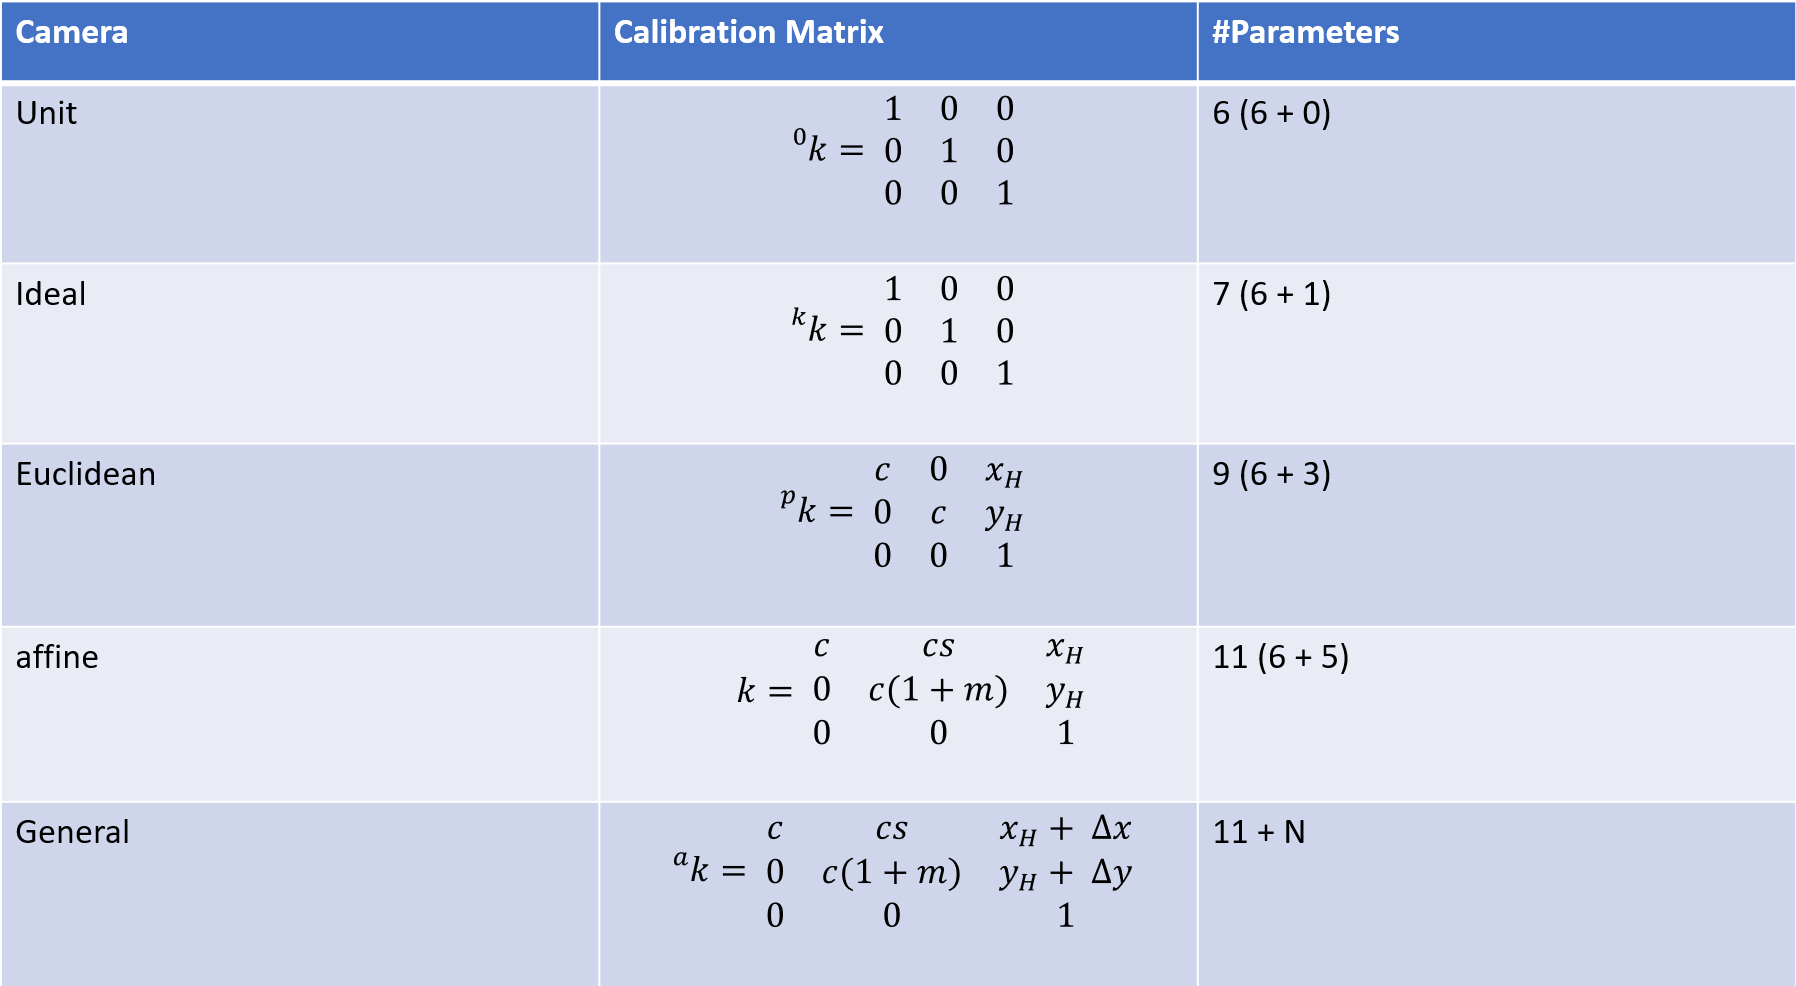

#### Salutations
1. Photogrammetric Computer Vision: Statistics, Geometry, Orientation and Reconstruction, by  Wolfgang Förstner , Bernhard P. Wrobel
2. Multiple View Geometry in Computer Vision (Second Edition), by Andrew Zisserman
3. [Cyrill Stachniss](https://www.youtube.com/channel/UCi1TC2fLRvgBQNe-T4dp8Eg)

In [1]:
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))